In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from prophet import Prophet

In [50]:
tr_df = pd.read_csv('DailyData.csv')

In [51]:
tr_df.head()

,campaign name,date,clicks,impressions,cost_micros,bidding_strategy_type,conversions,cost_per_conversion,Click-through rate (CTR),average cost per click (CPC),cost-per-acquisition (CPA),Cost,conversion per euro
0,SHOPTIMISED PMax-46 - all products-M,2023-11-28,0,33,0,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.000000,0.000000,0.000000,0.00,0.000000
1,SHOPTIMISED PMax-46 - all products-M,2023-11-29,11,1139,4060000,MAXIMIZE_CONVERSION_VALUE,1.000000,4060000.000,0.965759,0.369091,4.060000,4.06,0.246305
2,SHOPTIMISED PMax-46 - all products-M,2023-11-30,7,655,1430000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,1.068702,0.204286,4.085714,1.43,0.000000
3,SHOPTIMISED PMax-46 - all products-M,2023-12-01,5,684,2640000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.730994,0.528000,10.560000,2.64,0.000000
4,SHOPTIMISED PMax-46 - all products-M,2023-12-02,43,3792,10510000,MAXIMIZE_CONVERSION_VALUE,3.332276,3154000.449,1.133966,0.244419,3.154000,10.51,0.317058


In [52]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   campaign name                 176 non-null    object 
 1   date                          176 non-null    object 
 2   clicks                        176 non-null    int64  
 3   impressions                   176 non-null    int64  
 4   cost_micros                   176 non-null    int64  
 5   bidding_strategy_type         176 non-null    object 
 6   conversions                   176 non-null    float64
 7   cost_per_conversion           170 non-null    float64
 8   Click-through rate (CTR)      176 non-null    float64
 9   average cost per click (CPC)  176 non-null    float64
 10  cost-per-acquisition (CPA)    176 non-null    float64
 11  Cost                          176 non-null    float64
 12  conversion per euro           176 non-null    float64
dtypes: fl

In [53]:
tr_df['date'] = pd.to_datetime(tr_df['date'])

In [54]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   campaign name                 176 non-null    object        
 1   date                          176 non-null    datetime64[ns]
 2   clicks                        176 non-null    int64         
 3   impressions                   176 non-null    int64         
 4   cost_micros                   176 non-null    int64         
 5   bidding_strategy_type         176 non-null    object        
 6   conversions                   176 non-null    float64       
 7   cost_per_conversion           170 non-null    float64       
 8   Click-through rate (CTR)      176 non-null    float64       
 9   average cost per click (CPC)  176 non-null    float64       
 10  cost-per-acquisition (CPA)    176 non-null    float64       
 11  Cost                          17

In [55]:
df =tr_df[['date', 'conversions']].rename(columns={'date': 'ds', 'conversions': 'y'})

In [56]:
df.head()

,ds,y
0,2023-11-28,0.000000
1,2023-11-29,1.000000
2,2023-11-30,0.000000
3,2023-12-01,0.000000
4,2023-12-02,3.332276


# conversions Trend

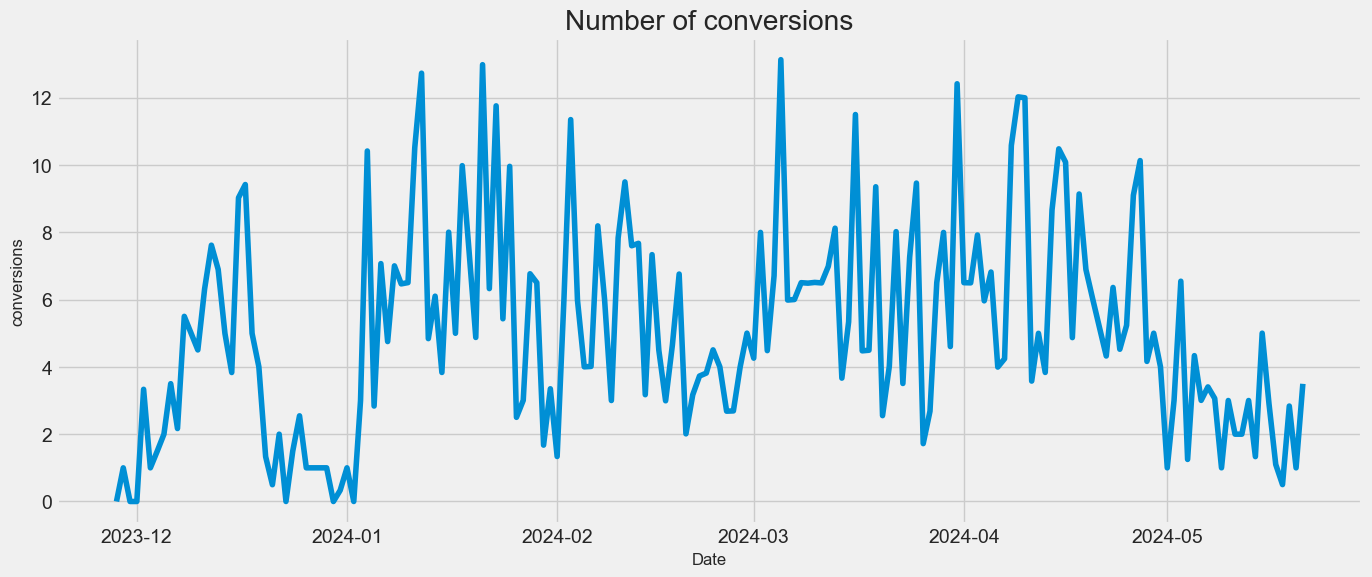

In [57]:
plt.figure(figsize = (15, 6))
plt.plot(df['ds'], df['y'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('conversions', {'fontsize': 12})
plt.title('Number of conversions')
plt.show()

In [58]:
model = Prophet()
model.fit(df)

17:51:34 - cmdstanpy - INFO - Chain [1] start processing
17:51:34 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [68]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-28,4.097940,0.347564,8.333851,4.097940,4.097940,0.199370,0.199370,0.199370,0.199370,0.199370,0.199370,0.0,0.0,0.0,4.297310
1,2023-11-29,4.112676,-0.406292,7.413937,4.112676,4.112676,-0.544677,-0.544677,-0.544677,-0.544677,-0.544677,-0.544677,0.0,0.0,0.0,3.567999
2,2023-11-30,4.127413,-0.021996,7.788390,4.127413,4.127413,-0.120779,-0.120779,-0.120779,-0.120779,-0.120779,-0.120779,0.0,0.0,0.0,4.006634
3,2023-12-01,4.142149,0.477694,8.364285,4.142149,4.142149,-0.058099,-0.058099,-0.058099,-0.058099,-0.058099,-0.058099,0.0,0.0,0.0,4.084050
4,2023-12-02,4.156886,0.015178,7.917144,4.156886,4.156886,-0.070575,-0.070575,-0.070575,-0.070575,-0.070575,-0.070575,0.0,0.0,0.0,4.086311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2024-06-16,5.720540,2.420723,9.847487,5.700908,5.739341,0.422140,0.422140,0.422140,0.422140,0.422140,0.422140,0.0,0.0,0.0,6.142679
202,2024-06-17,5.724732,2.091739,9.824315,5.703839,5.745330,0.172621,0.172621,0.172621,0.172621,0.172621,0.172621,0.0,0.0,0.0,5.897353
203,2024-06-18,5.728924,1.897993,9.533201,5.706650,5.750410,0.199370,0.199370,0.199370,0.199370,0.199370,0.199370,0.0,0.0,0.0,5.928294
204,2024-06-19,5.733117,1.395733,9.288230,5.709385,5.755680,-0.544677,-0.544677,-0.544677,-0.544677,-0.544677,-0.544677,0.0,0.0,0.0,5.188440


In [69]:
result=pd.DataFrame()

In [72]:
result['date']=forecast['ds']
result['trend']=forecast['trend']
result['yhat_upper']=forecast['yhat_upper']
result['yhat_lower']=forecast['yhat_lower']
result['yhat']=forecast['yhat']
result.tail(35)

,date,trend,yhat_upper,yhat_lower,yhat
171,2024-05-17,5.594769,9.655138,1.783713,5.536670
172,2024-05-18,5.598961,9.294144,1.671672,5.528386
173,2024-05-19,5.603154,9.865124,2.050678,6.025293
174,2024-05-20,5.607346,9.389077,1.859024,5.779967
175,2024-05-21,5.611538,9.561286,1.771152,5.810908
176,2024-05-22,5.615731,9.229559,1.448359,5.071054
177,2024-05-23,5.619923,9.543164,1.926462,5.499144
178,2024-05-24,5.624116,9.252596,1.380214,5.566016
179,2024-05-25,5.628308,9.185699,1.590047,5.557733
180,2024-05-26,5.632500,10.166289,2.463844,6.054640


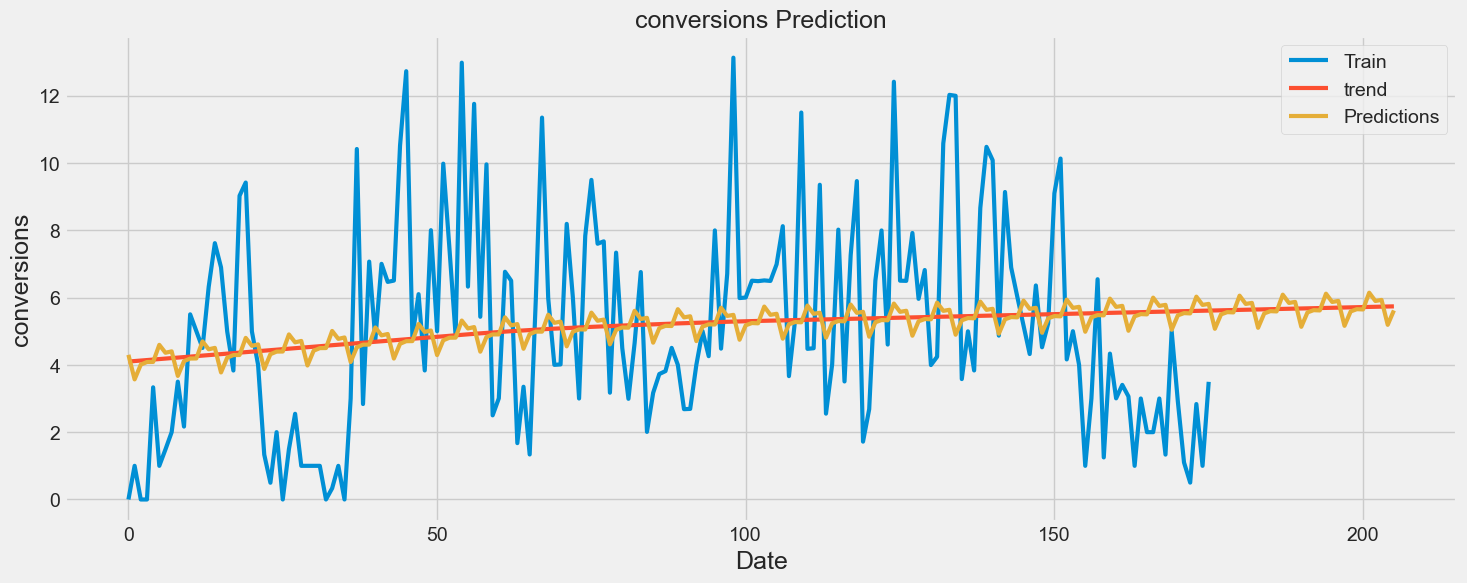

In [60]:
plt.figure(figsize= (16, 6))
plt.title('conversions Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('conversions', fontsize= 18)
plt.plot(df['y'], linewidth= 3)
plt.plot(forecast['trend'], linewidth= 3)
plt.plot(forecast["yhat"], linewidth= 3)
plt.legend(['Train', 'trend', 'Predictions'])